In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# set working directory
import os
os.getcwd()
path = os.getcwd()

In [ ]:
path

In [361]:
# Load the datasets
low_df = pd.read_csv(path + '/data/low_performance_sessions.csv', index_col=0)

In [ ]:
high_df.head()

In [358]:

def create_graph_from_df(df):
    G = nx.Graph()
    for _, row in df.iterrows():
        G.add_edge(row['sender_id'], row['receiver_id'])
    return G

In [ ]:
high_G = create_graph_from_df(high_df)
low_G = create_graph_from_df(low_df)

In [ ]:
# Compute network metrics
def compute_metrics(G):
    return {
        'density': nx.density(G),
        'degree_centrality': nx.degree_centrality(G),
        'betweenness_centrality': nx.betweenness_centrality(G),
        'average_clustering': nx.average_clustering(G)
    }

In [ ]:
high_metrics = compute_metrics(high_G)
display(high_metrics)
low_metrics = compute_metrics(low_G)
display(low_metrics)

In [ ]:

for metric in high_metrics:
    print(f"{metric.capitalize()} comparison:")
    print(f"High Performing: {high_metrics[metric]}")
    print(f"Low Performing: {low_metrics[metric]}\n")

# Visualize both networks
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# Draw high-performing network
plt.sca(axes[0])

nx.draw_networkx(high_G, ax=axes[0], node_size=1000, font_size=10, node_color='palegreen', edge_color='blue',with_labels=True, font_color='black', font_weight='bold')
plt.title('High Performing Sessions', fontsize=14)

# Draw low-performing network
plt.sca(axes[1])
nx.draw_networkx(low_G, ax=axes[1], node_size=1000, font_size=10, node_color='palegreen', edge_color='blue',with_labels=True, font_color='black', font_weight='bold')
plt.title('Low Performing Sessions', fontsize=14)


plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community
df_compare = pd.DataFrame(columns=['metric', 'high', 'low'])
df_compare['metric'] = ['modularity', 'average_shortest_path_length', 'clustering_coefficient']

# Load the data
data = high_df


G = nx.from_pandas_edgelist(data, 'sender_id', 'receiver_id', create_using=nx.Graph())


communities = community.greedy_modularity_communities(G)
modularity = community.modularity(G, communities)


hubs, authorities = nx.hits(G)

# Small-worldness
average_shortest_path_length = nx.average_shortest_path_length(G)
clustering_coefficient = nx.average_clustering(G)

# Scale-free properties check
degree_distribution = [G.degree(n) for n in G.nodes()]


# Network Resilience - simulate a failure
G_copy = G.copy()
# Assume nodes are removed from the network
removed_nodes = [n for n in G_copy.nodes() if G_copy.degree(n) > 5]


df_compare['high'] = [modularity, average_shortest_path_length, clustering_coefficient]
# compare high amd low
# Load the data
data = low_df


G = nx.from_pandas_edgelist(data, 'sender_id', 'receiver_id', create_using=nx.Graph())


communities = community.greedy_modularity_communities(G)
modularity = community.modularity(G, communities)


hubs, authorities = nx.hits(G)

# Small-worldness
average_shortest_path_length = nx.average_shortest_path_length(G)
clustering_coefficient = nx.average_clustering(G)

# Scale-free properties check
degree_distribution = [G.degree(n) for n in G.nodes()]


# Network Resilience - simulate a failure
G_copy = G.copy()
# Assume nodes are removed from the network
removed_nodes = [n for n in G_copy.nodes() if G_copy.degree(n) > 5]


df_compare['low'] = [modularity, average_shortest_path_length, clustering_coefficient]
# Cre

In [ ]:
df_compare

In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [ ]:


# Creating the DataFrame
attribute_table = pd.DataFrame({
    'id': range(9),  # equivalent to 0:8 in R
    'name': ["All", "Igor", "Ashley", "Will", "Katya", "Saleh", "Oleg", "Vika", "Alex"]
})

gender_assumptions = {
    'All': 'NA',  # Assuming 'M' for Male, 'F' for Female as placeholders
    'Igor': 'M',
    'Ashley': 'F',
    'Will': 'M',
    'Katya': 'F',
    'Saleh': 'M',
    'Oleg': 'M',
    'Vika': 'F',
    'Alex': 'M'
}
attribute_table['gender'] = attribute_table['name'].map(gender_assumptions)

print(attribute_table)


In [ ]:
att = pd.read_csv(path + '/data/attributes.csv', index_col=0)

In [ ]:
data

In [ ]:

# Predictors and target variable
X = data[['sender_id', 'receiver_id', 'sender_gender', 'receiver_gender']]
y = data['dialog'].astype('category')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = Sequential()
# model.add(Flatten())
model.add(Dense(y.shape[1], activation='softmax'))

In [ ]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
communications = high_df[['sender_id', 'receiver_id']]

# Map sender and receiver genders
communications['sender_gender'] = communications['sender_id'].map(attribute_table.set_index('id')['gender'])
communications['receiver_gender'] = communications['receiver_id'].map(attribute_table.set_index('id')['gender'])

print(communications)

Interaction counts by gender:
receiver_gender     F     M  NA
sender_gender                  
F                2025  2996   9
M                2999  1850   0


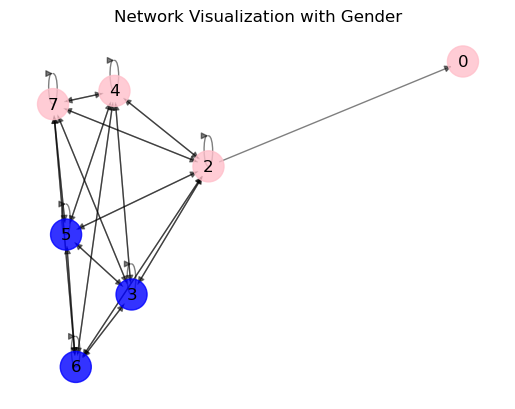

In [349]:

# Create a graph from the communications DataFrame
G = nx.from_pandas_edgelist(communications, 'sender_id', 'receiver_id', create_using=nx.DiGraph())

gender_dict = attribute_table.set_index('id')['gender'].to_dict()
nx.set_node_attributes(G, gender_dict, 'gender')

# Simple network analysis example: Count interactions by gender
interaction_counts = communications.groupby(['sender_gender', 'receiver_gender']).size().unstack(fill_value=0)
print("Interaction counts by gender:")
print(interaction_counts)

# Visualization
pos = nx.spring_layout(G)  # positions for all nodes

# Draw nodes with different colors for different genders
colors = ['blue' if G.nodes[node]['gender'] == 'M' else 'pink' for node in G]
nx.draw_networkx_nodes(G, pos, node_color=colors, node_size=500, alpha=0.8)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
nx.draw_networkx_labels(G, pos)

plt.title("Network Visualization with Gender")
plt.axis('off')
plt.show()


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph from the communications DataFrame
G = nx.from_pandas_edgelist(communications, 'sender_id', 'receiver_id', create_using=nx.DiGraph())

# Add gender attributes to nodes
gender_dict = attribute_table.set_index('id')['gender'].to_dict()
nx.set_node_attributes(G, gender_dict, 'gender')
interaction_counts.dropna(inplace=True)
interaction_counts = communications.groupby(['sender_gender', 'receiver_gender']).size().unstack(fill_value=0)

print("Interaction counts by gender:")
print(interaction_counts)

In [ ]:
# remoge NA

# Visualization
pos = nx.spring_layout(G)  # positions for all nodes

colors = ['blue' if G.nodes[node]['gender'] == 'M' else 'pink' for node in G]
nx.draw_networkx_nodes(G, pos, node_color=colors, node_size=500, alpha=0.8)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
nx.draw_networkx_labels(G, pos)

plt.title("Network Visualization with Gender")
plt.axis('off')
plt.show()


In [350]:
# Calculate the number of interactions based on sender and receiver genders
interaction_counts = communications.groupby(['sender_gender', 'receiver_gender']).size().unstack(fill_value=0)

print(interaction_counts)

# Extracting the count of male-to-male interactions
male_to_male_count = interaction_counts.loc['M', 'M']
total_interactions = communications.shape[0]

print(f"Male to Male interactions: {male_to_male_count}")
print(f"Total interactions: {total_interactions}")
print(f"Percentage of Male to Male interactions: {male_to_male_count / total_interactions * 100:.2f}%")


receiver_gender     F     M  NA
sender_gender                  
F                2025  2996   9
M                2999  1850   0
Male to Male interactions: 1850
Total interactions: 9879
Percentage of Male to Male interactions: 18.73%


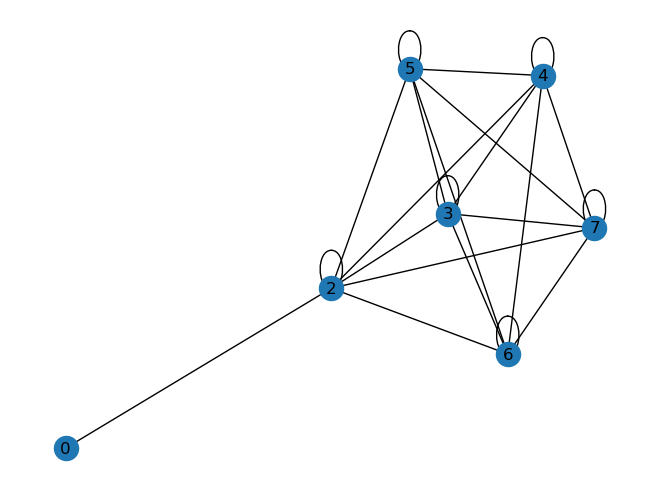

In [348]:
import pandas as pd
import numpy as np
import networkx as nx
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from statsmodels.discrete.discrete_model import Logit
from sklearn.metrics import classification_report
# Assuming CSV files are in the current working directory
high_perf = high_df
low_perf = low_df
# Selecting attributes from the high-performance dataset as an example
attributes = high_perf.iloc[:, 4:13]  # Adjust indices as needed

# Save attributes to a file (optional)
attributes.to_pickle("data/attributes.pkl")  # Using pickle for simplicity
G = nx.from_pandas_edgelist(high_perf, 'sender_id', 'receiver_id')
nx.draw(G, with_labels=True)
plt.show()

## New

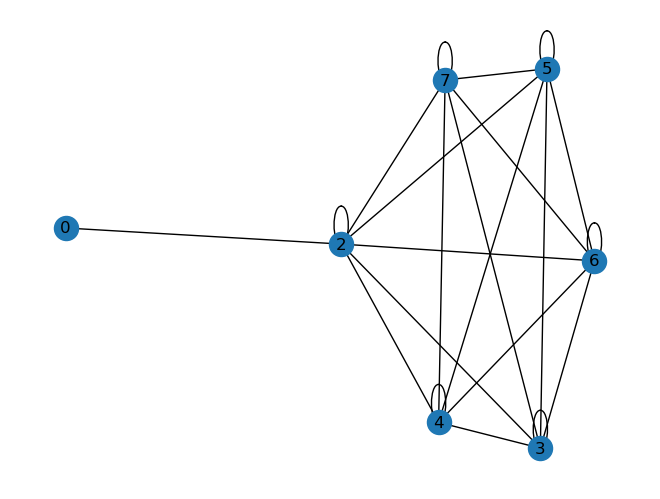

In [341]:
G = nx.from_pandas_edgelist(high_perf, 'sender_id', 'receiver_id')
nx.draw(G, with_labels=True)
plt.show()

In [342]:
high_perf = pd.read_csv(path + '/data/low_performance_sessions.csv', index_col=0)
X = high_perf.drop(columns=['dialog'])
y = high_perf['dialog']

from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(high_perf['dialog'])

print(label_encoder.classes_)

['backchannel' 'disruption' 'floor-grabber' 'question' 'statement']


In [351]:
if isinstance(X, pd.DataFrame):
    X = X.values

X

array([[2102, 1, 1, 2, 'Male', 'Female'],
       [2102, 2, 2, 3, 'Female', 'Male'],
       [2102, 3, 3, 1, 'Male', 'Male'],
       ...,
       [2117, 6661, 6, 7, 'Male', 'Female'],
       [2117, 6662, 7, 6, 'Female', 'Male'],
       [2117, 6663, 6, 2, 'Male', 'Female']], dtype=object)

In [353]:
from statsmodels.discrete.discrete_model import MNLogit
model = MNLogit(y, X).fit()

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [354]:
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                 9879
Model:                        MNLogit   Df Residuals:                     9859
Method:                           MLE   Df Model:                           16
Date:                Sun, 07 Apr 2024   Pseudo R-squ.:                0.002835
Time:                        13:16:21   Log-Likelihood:                -9920.7
converged:                       True   LL-Null:                       -9948.9
Covariance Type:            nonrobust   LLR p-value:                 2.078e-06
===================================================================================
            y=1       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
session            -0.0001      0.000     -0.651      0.515      -0.000       0.000
sender_id          -0.0604      0.046     -1.327      0.184      -0.150       0.029
receiver_id         0.0768      0.045      1.705      0.088      -0.012       0.165
sender_gender      -0.0648      0.170     -0.381      0.703      -0.399       0.269
receiver_gender    -0.1751      0.168     -1.043      0.297      -0.504       0.154
-----------------------------------------------------------------------------------
            y=2       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
session            -0.0001      0.000     -0.914      0.361      -0.000       0.000
sender_id           0.0371      0.038      0.970      0.332      -0.038       0.112
receiver_id         0.1109      0.039      2.859      0.004       0.035       0.187
sender_gender       0.0959      0.144      0.665      0.506      -0.187       0.378
receiver_gender    -0.0103      0.143     -0.072      0.943      -0.291       0.270
-----------------------------------------------------------------------------------
            y=3       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
session             0.0006      0.000      5.652      0.000       0.000       0.001
sender_id           0.0730      0.032      2.310      0.021       0.011       0.135
receiver_id         0.0708      0.032      2.194      0.028       0.008       0.134
sender_gender       0.2027      0.119      1.699      0.089      -0.031       0.437
receiver_gender    -0.0739      0.119     -0.623      0.533      -0.306       0.159
-----------------------------------------------------------------------------------
            y=4       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
session             0.0011      0.000     10.675      0.000       0.001       0.001
sender_id           0.0491      0.030      1.614      0.107      -0.011       0.109
receiver_id         0.0859      0.031      2.757      0.006       0.025       0.147
sender_gender      -0.0134      0.115     -0.116      0.907      -0.239       0.212
receiver_gender    -0.1092      0.114     -0.955      0.339      -0.333       0.115
===================================================================================
"""

In [347]:
# Predict the dialog for the high-performance dataset
y_pred = model.predict(X)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(y, y_pred))

ValueError: shapes (6663,6) and (5,4) not aligned: 6 (dim 1) != 5 (dim 0)

In [346]:
# confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_pred)


ValueError: Found input variables with inconsistent numbers of samples: [6663, 9879]

In [ ]:
X

In [ ]:
import numpy as np

model = MNLogit(y, X).fit()
summary = model.summary()
params = model.params
model.params.shape

In [ ]:
params.shape

ValueError: The number of FixedLocator locations (5), usually from a call to set_ticks, does not match the number of labels (4).

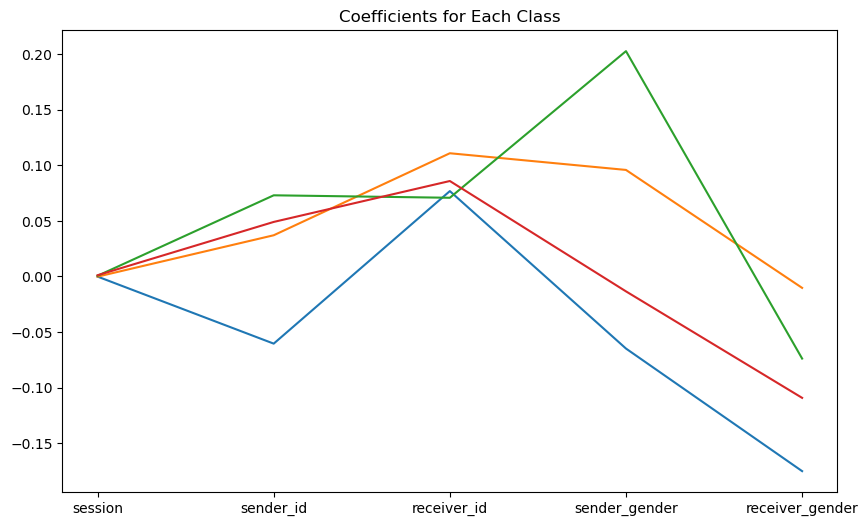

In [355]:

# Plotting
plt.figure(figsize=(10, 6))
for i in range(params.shape[1]):
    plt.plot(params[i], label=f'Class {i}')

plt.title('Coefficients for Each Class')
plt.xticks(np.arange(len(params)), params, rotation=90)
plt.ylabel('Coefficient Value')
plt.legend()
plt.show()

In [356]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
predictions = model.predict(X)
predictions = np.argmax(predictions, axis=1)
cm = confusion_matrix(y, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()

ValueError: shapes (6663,6) and (5,4) not aligned: 6 (dim 1) != 5 (dim 0)

In [357]:
predictions.iloc[:30].plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Predicted Class Probabilities for the First 30 Observations')
plt.xlabel('Observation Index')
plt.ylabel('Probability')
plt.show()


AttributeError: 'numpy.ndarray' object has no attribute 'iloc'